In [ ]:
pip install --upgrade shap

# Importing libraries

In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import shap
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#1 - Cleaning the dataset
Turning 'Date' into datetime

Replacing '24:00' in 'Time' with '00:00'

Combining 'Date' and 'Time'

Saving the dataset as csv

In [ ]:
# df = pd.read_excel("/content/air_quality_Sylhet_dataset.xlsx")

In [ ]:
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
# df['Time'] = df['Time'].apply(lambda x: "00:00" if x == "24:00" else x)

# def combine_date_time(row):
#   if pd.notna(row['Time']):
#     return pd.to_datetime(str(row['Date'].date()) + ' ' + str(row['Time']))
#   else:
#     return row['Date']

# df['DateTime'] = df.apply(combine_date_time, axis=1)

In [ ]:
# df.drop(['Date', 'Time', 'V Wind Speed'], axis=1, inplace=True)
# df = df.set_index('DateTime').sort_index()
# df.head()

In [ ]:
# df.to_csv("cleaned_air_quality.csv")

#2 - Exploring dataset
Read the csv file into a Dataframe

Showed a few samples

Showed info, describe, total null values

Set 'DateTime' as index

In [ ]:
df = pd.read_csv("/content/cleaned_air_quality.csv")
df.tail()

/tmp/ipython-input-3798806167.py:2: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/content/cleaned_air_quality.csv")


,DateTime,SO2,NO,NO2,NOX,CO,CO 8hr,O3,O3 8hr,PM2.5,PM10,Wind Speed,Wind Dir,Temperature,RH,Solar Rad,BP,Rain
80059,2021-12-19 20:00:00,NaN,NaN,NaN,NaN,21.71,NaN,3.14,NaN,67.57,116.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80060,2021-12-19 21:00:00,NaN,NaN,NaN,NaN,22.20,NaN,3.04,NaN,68.89,121.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80061,2021-12-19 22:00:00,NaN,NaN,NaN,NaN,22.50,NaN,3.22,NaN,111.83,176.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80062,2021-12-19 23:00:00,NaN,NaN,NaN,NaN,22.51,NaN,3.15,NaN,68.25,112.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80063,2021-12-20 00:00:00,NaN,NaN,NaN,NaN,22.88,NaN,3.20,NaN,99.19,162.79,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80064 entries, 0 to 80063
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DateTime     80064 non-null  object 
 1   SO2          27682 non-null  float64
 2   NO           55570 non-null  float64
 3   NO2          55812 non-null  float64
 4   NOX          56968 non-null  object 
 5   CO           44791 non-null  float64
 6   CO 8hr       44484 non-null  float64
 7   O3           40521 non-null  float64
 8   O3 8hr       37637 non-null  float64
 9   PM2.5        50563 non-null  float64
 10  PM10         51734 non-null  float64
 11  Wind Speed   53602 non-null  float64
 12  Wind Dir     52485 non-null  float64
 13  Temperature  53196 non-null  float64
 14  RH           53386 non-null  float64
 15  Solar Rad    53374 non-null  float64
 16  BP           48310 non-null  float64
 17  Rain         28892 non-null  float64
dtypes: float64(16), object(2)
memory usage: 11.0+ 

In [ ]:
df['NOX'] = pd.to_numeric(df['NOX'], errors='coerce')

In [ ]:
df.describe()

,SO2,NO,NO2,NOX,CO,CO 8hr,O3,O3 8hr,PM2.5,PM10,Wind Speed,Wind Dir,Temperature,RH,Solar Rad,BP,Rain
count,27682.000000,55570.000000,55812.000000,56901.000000,44791.000000,44484.000000,40521.000000,37637.000000,50563.000000,51734.000000,53602.000000,52485.000000,53196.000000,53386.000000,53374.000000,48310.000000,28892.000000
mean,4.587183,14.741531,10.361009,24.172783,2.479324,2.221166,9.510829,10.089234,54.052198,99.414747,2.052014,134.149627,25.366582,76.235301,174.975891,1020.573672,0.241303
std,5.317407,34.099895,8.319867,37.607933,2.724073,1.719710,10.367884,9.181136,55.517603,90.992499,1.481404,90.444871,4.611450,15.005270,246.062031,30.110581,0.886882
min,0.010000,0.050000,0.010000,0.020000,0.030000,0.070000,0.050000,0.050000,0.020000,0.170000,0.000000,0.000000,7.700000,19.500000,3.120000,989.190000,0.010000
25%,1.720000,2.850000,5.050000,8.190000,0.840000,0.862500,2.680000,3.533750,17.220000,40.030000,0.760000,58.380000,22.290000,66.760000,7.610000,1004.382500,0.020000
50%,2.960000,4.270000,8.110000,12.580000,1.730000,1.738750,5.350000,7.062857,34.860000,70.925000,1.820000,103.310000,26.040000,79.130000,12.380000,1009.840000,0.030000
75%,5.320000,8.760000,13.120000,21.990000,3.170000,3.150313,13.070000,14.076250,71.505000,129.497500,2.900000,210.000000,28.570000,87.990000,306.900000,1014.250000,0.040000
max,108.890000,398.600000,139.350000,398.230000,24.880000,10.605000,97.020000,69.966250,985.000000,985.000000,12.990000,360.000000,38.280000,99.400000,1017.800000,1101.960000,25.230000


In [ ]:
df.isnull().sum()

,0
DateTime,0
SO2,52382
NO,24494
NO2,24252
NOX,23163
CO,35273
CO 8hr,35580
O3,39543
O3 8hr,42427
PM2.5,29501


In [ ]:
df = df.set_index('DateTime').sort_index()
df.columns

Index(['SO2', 'NO', 'NO2', 'NOX', 'CO', 'CO 8hr', 'O3', 'O3 8hr', 'PM2.5',
       'PM10', 'Wind Speed', 'Wind Dir', 'Temperature', 'RH', 'Solar Rad',
       'BP', 'Rain'],
      dtype='object')

In [ ]:
df.head()

,SO2,NO,NO2,NOX,CO,CO 8hr,O3,O3 8hr,PM2.5,PM10,Wind Speed,Wind Dir,Temperature,RH,Solar Rad,BP,Rain
DateTime,,,,,,,,,,,,,,,,,
2012-11-01 00:00:00,NaN,6.96,7.62,14.66,4.67,4.56875,0.86,5.08,45.70,44.88,1.81,191.91,25.71,78.53,7.46,1093.01,0.01
2012-11-01 01:00:00,NaN,4.55,7.56,12.15,NaN,NaN,1.06,NaN,27.87,31.03,3.58,203.18,25.22,84.16,7.11,1092.60,0.03
2012-11-01 02:00:00,NaN,3.41,5.12,8.55,NaN,NaN,1.87,NaN,24.03,31.89,3.22,185.72,24.82,82.08,7.19,1092.21,0.03
2012-11-01 03:00:00,NaN,2.87,3.36,6.25,NaN,NaN,2.66,NaN,24.84,29.00,3.32,194.05,24.26,82.41,7.11,1092.01,0.02
2012-11-01 04:00:00,NaN,NaN,2.84,5.63,NaN,NaN,2.97,NaN,20.00,28.69,3.23,193.50,23.86,76.52,7.11,1092.13,0.03


#3 - Visualize with missingno
Visualizing missingness with missingno

matrix, dendrogram, bar, heatmap

<Axes: >

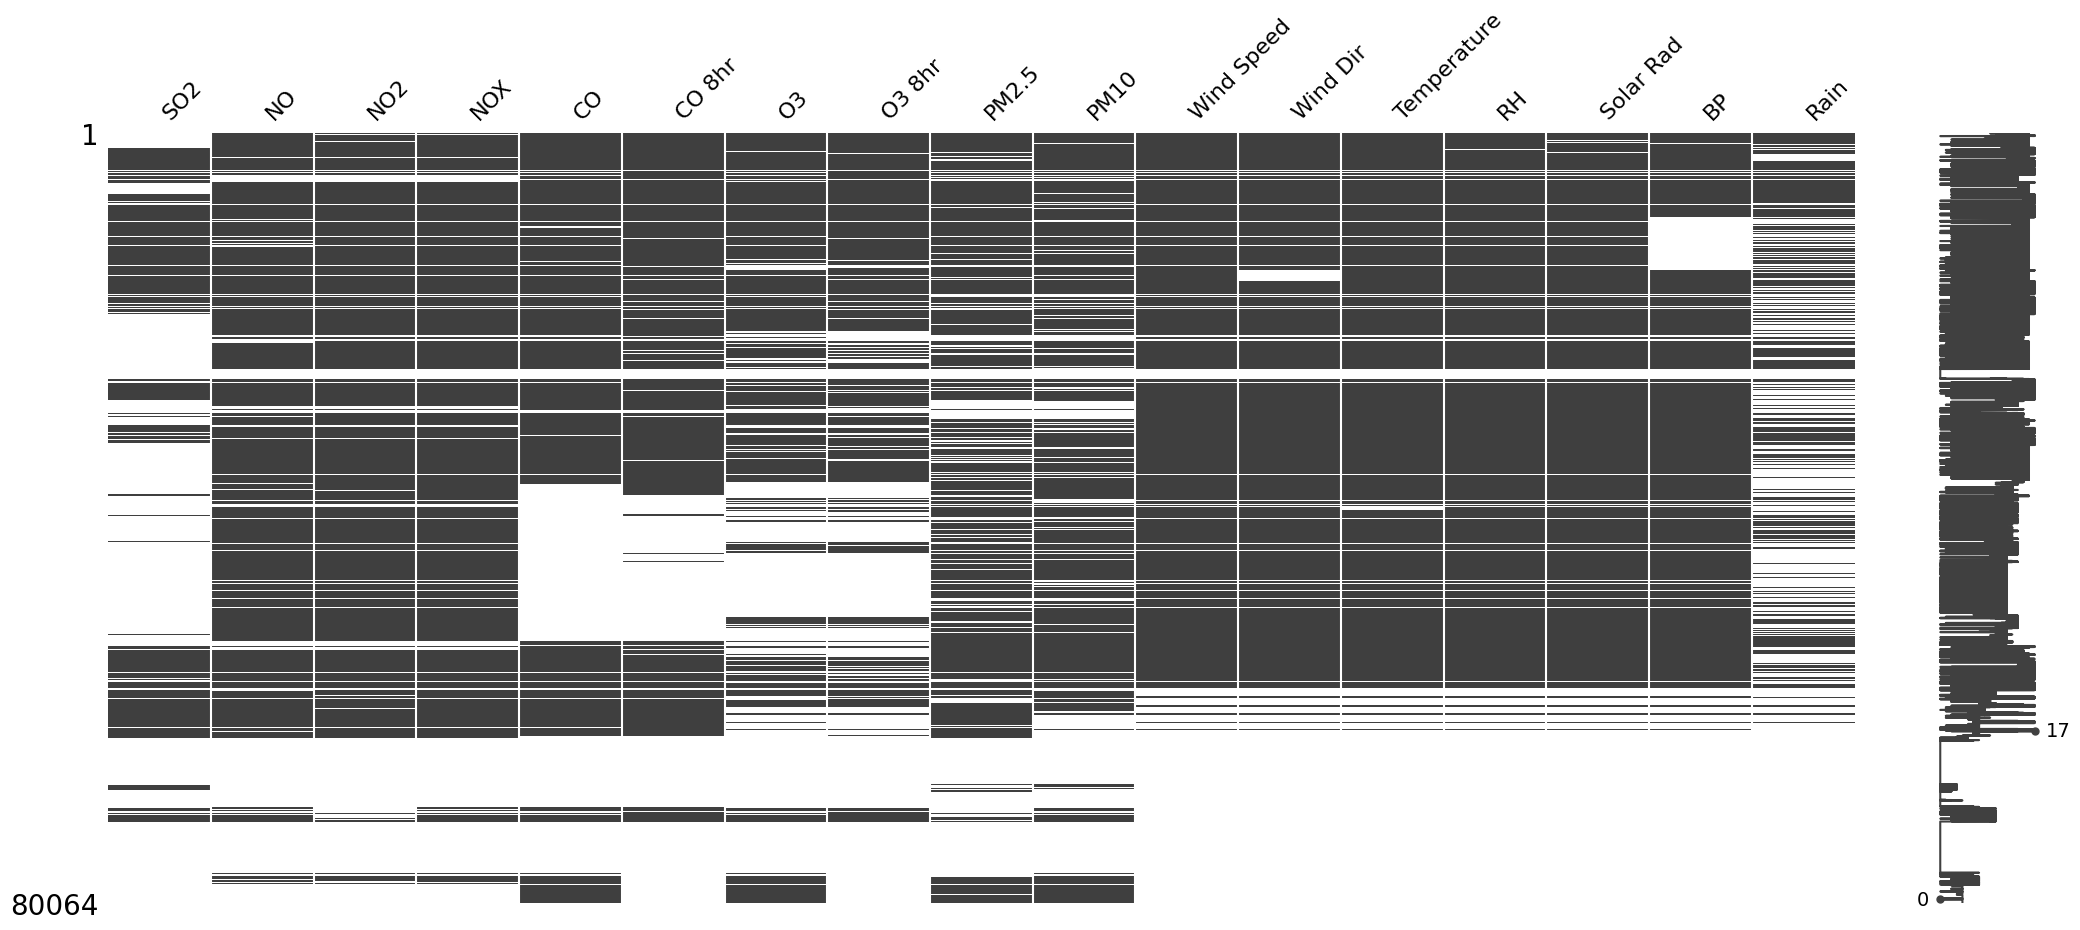

In [ ]:
msno.matrix(df)

<Axes: >

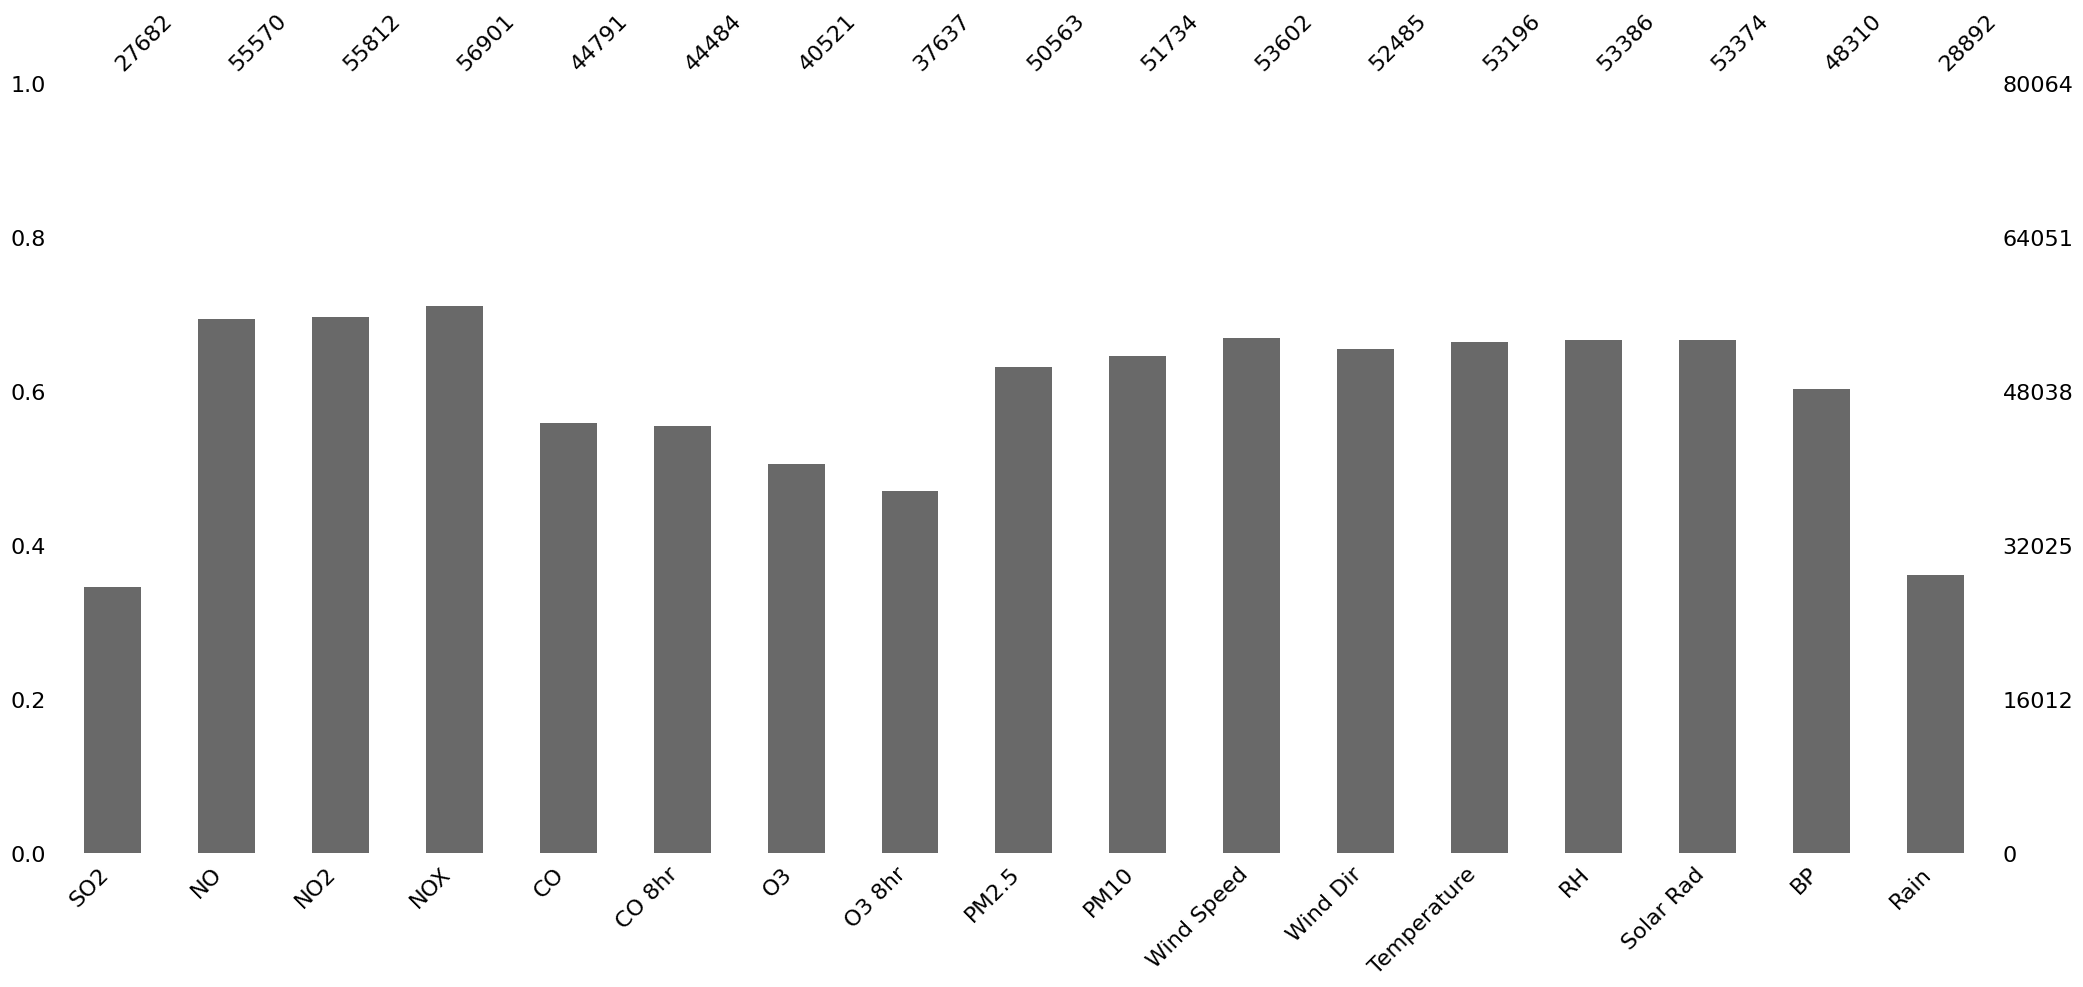

In [ ]:
msno.bar(df)

<Axes: >

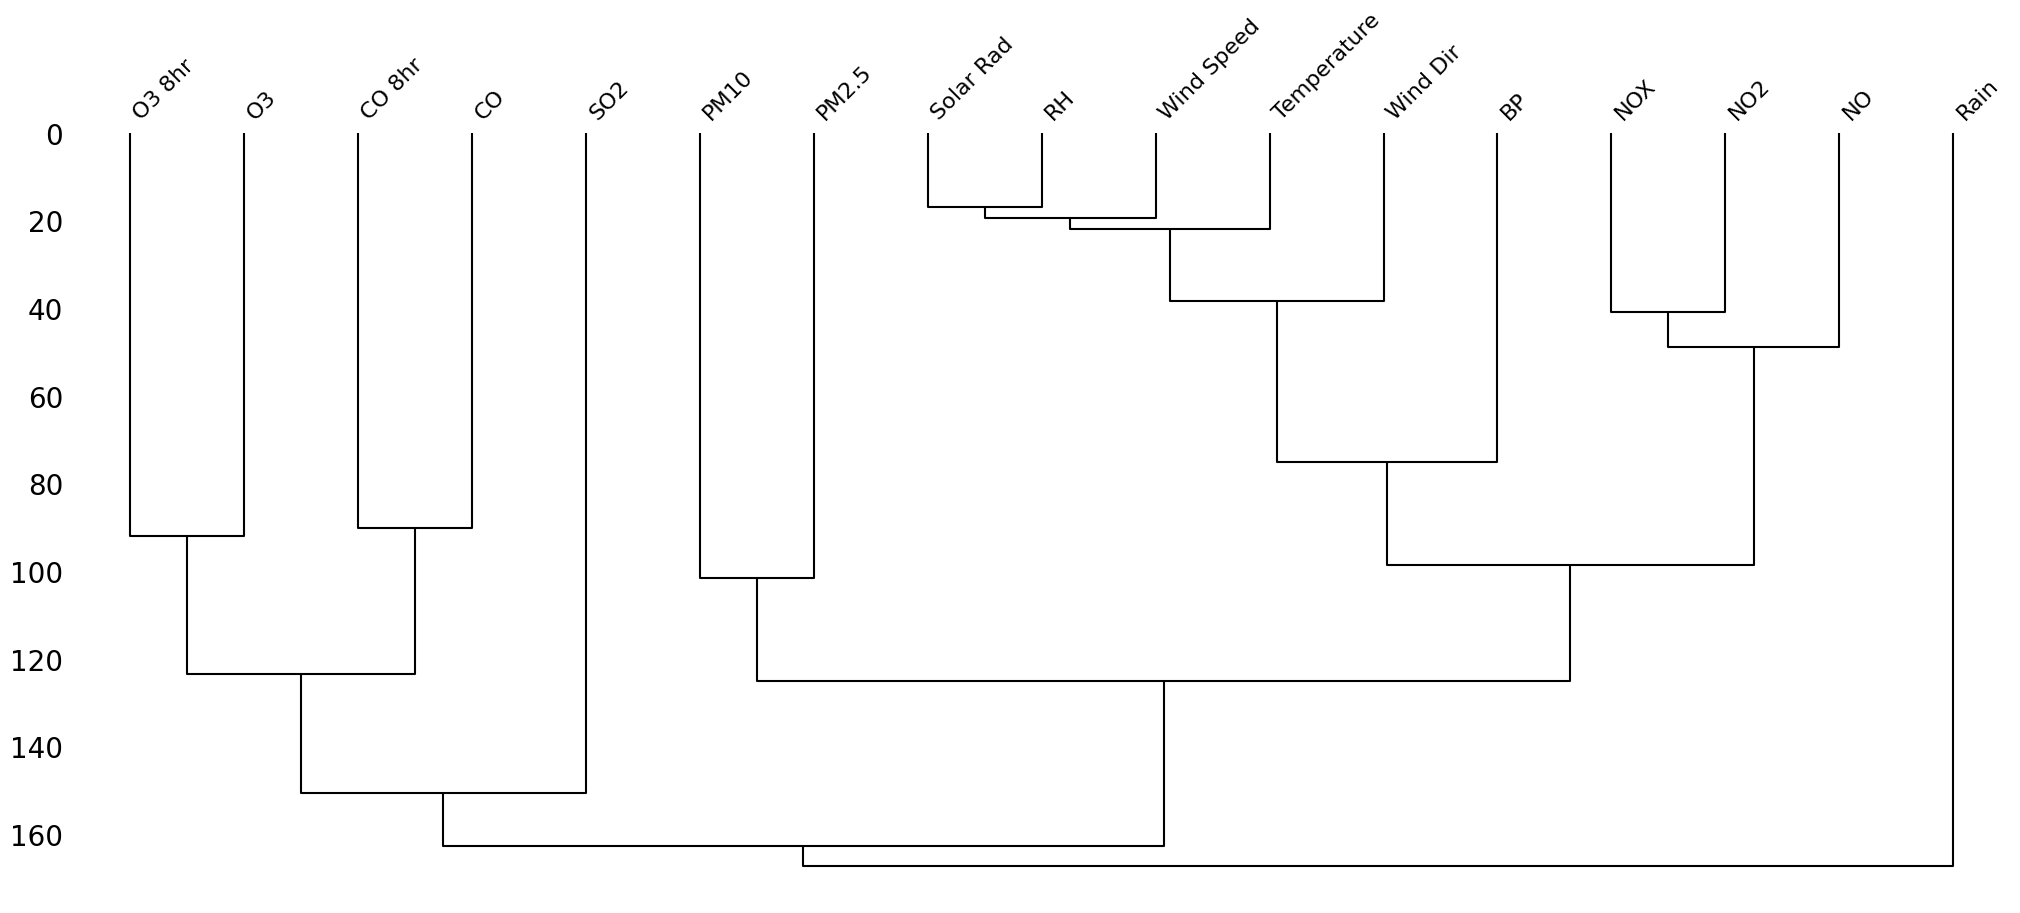

In [ ]:
msno.dendrogram(df)

<Axes: >

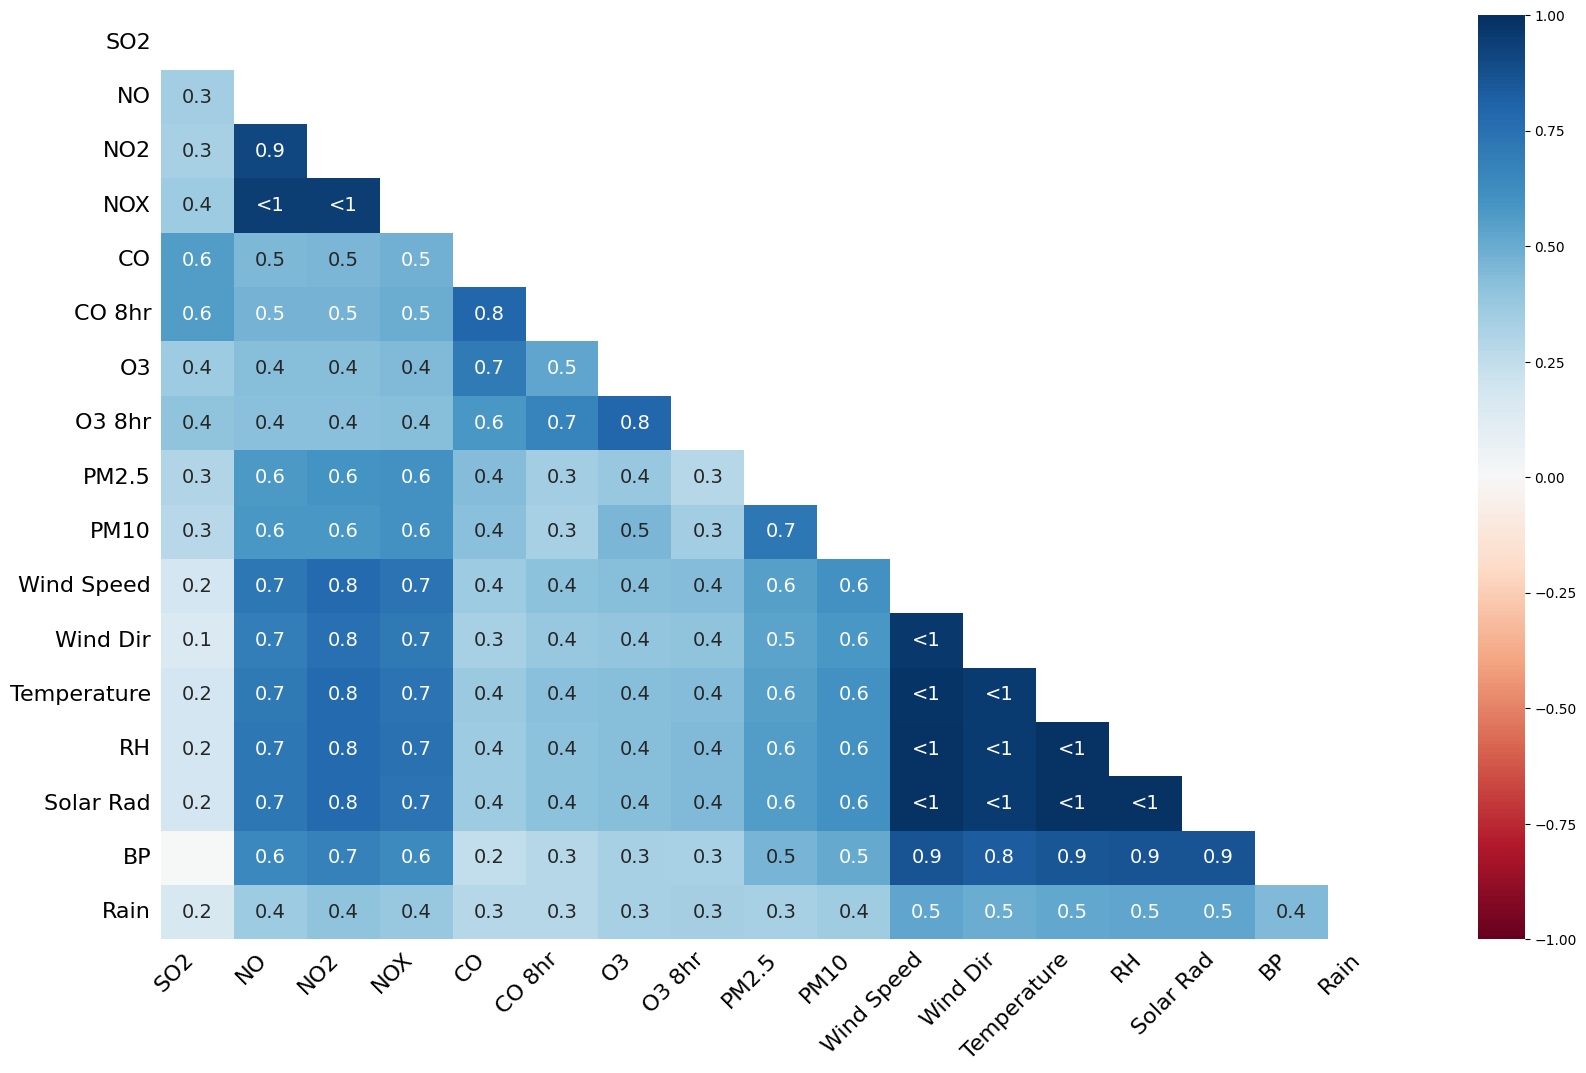

In [ ]:
msno.heatmap(df)

Visualize relationship and changes in columns

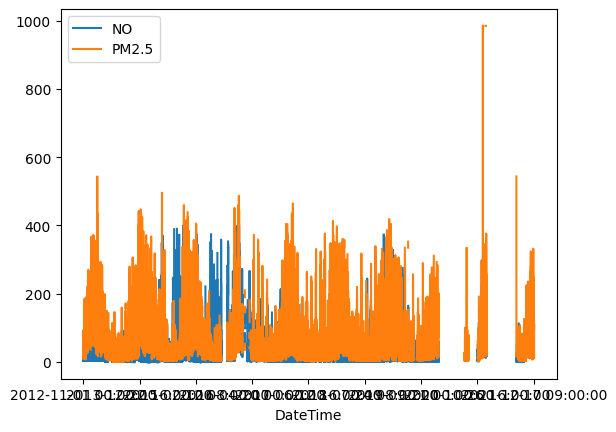

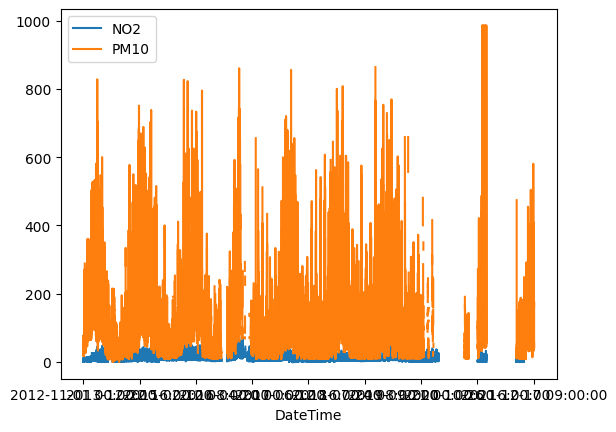

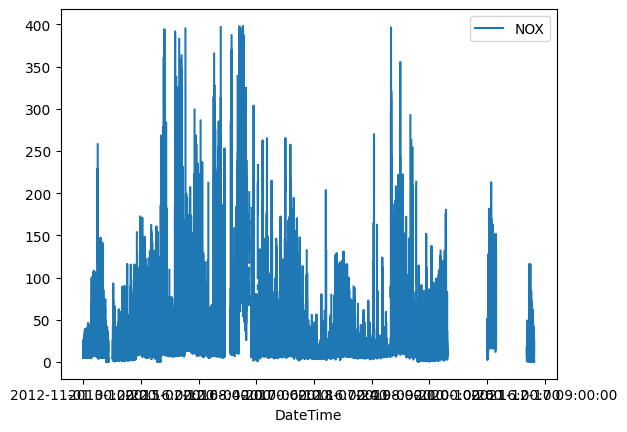

In [ ]:
df.plot(y=['NO','PM2.5'])
df.plot(y=['NO2', 'PM10'])
df.plot(y='NOX')
plt.show()

#4 - Fill missing values
Fill missing values with forward-fill method

In [ ]:
df.ffill(axis=1, inplace=True)
df.isnull().sum()

,0
SO2,52382
NO,22184
NO2,21236
NOX,21221
CO,18330
CO 8hr,16451
O3,16414
O3 8hr,16313
PM2.5,16090
PM10,16068


#5 - Visualize missingness after ffill
Visual maps show which columns still have missing values

<Axes: >

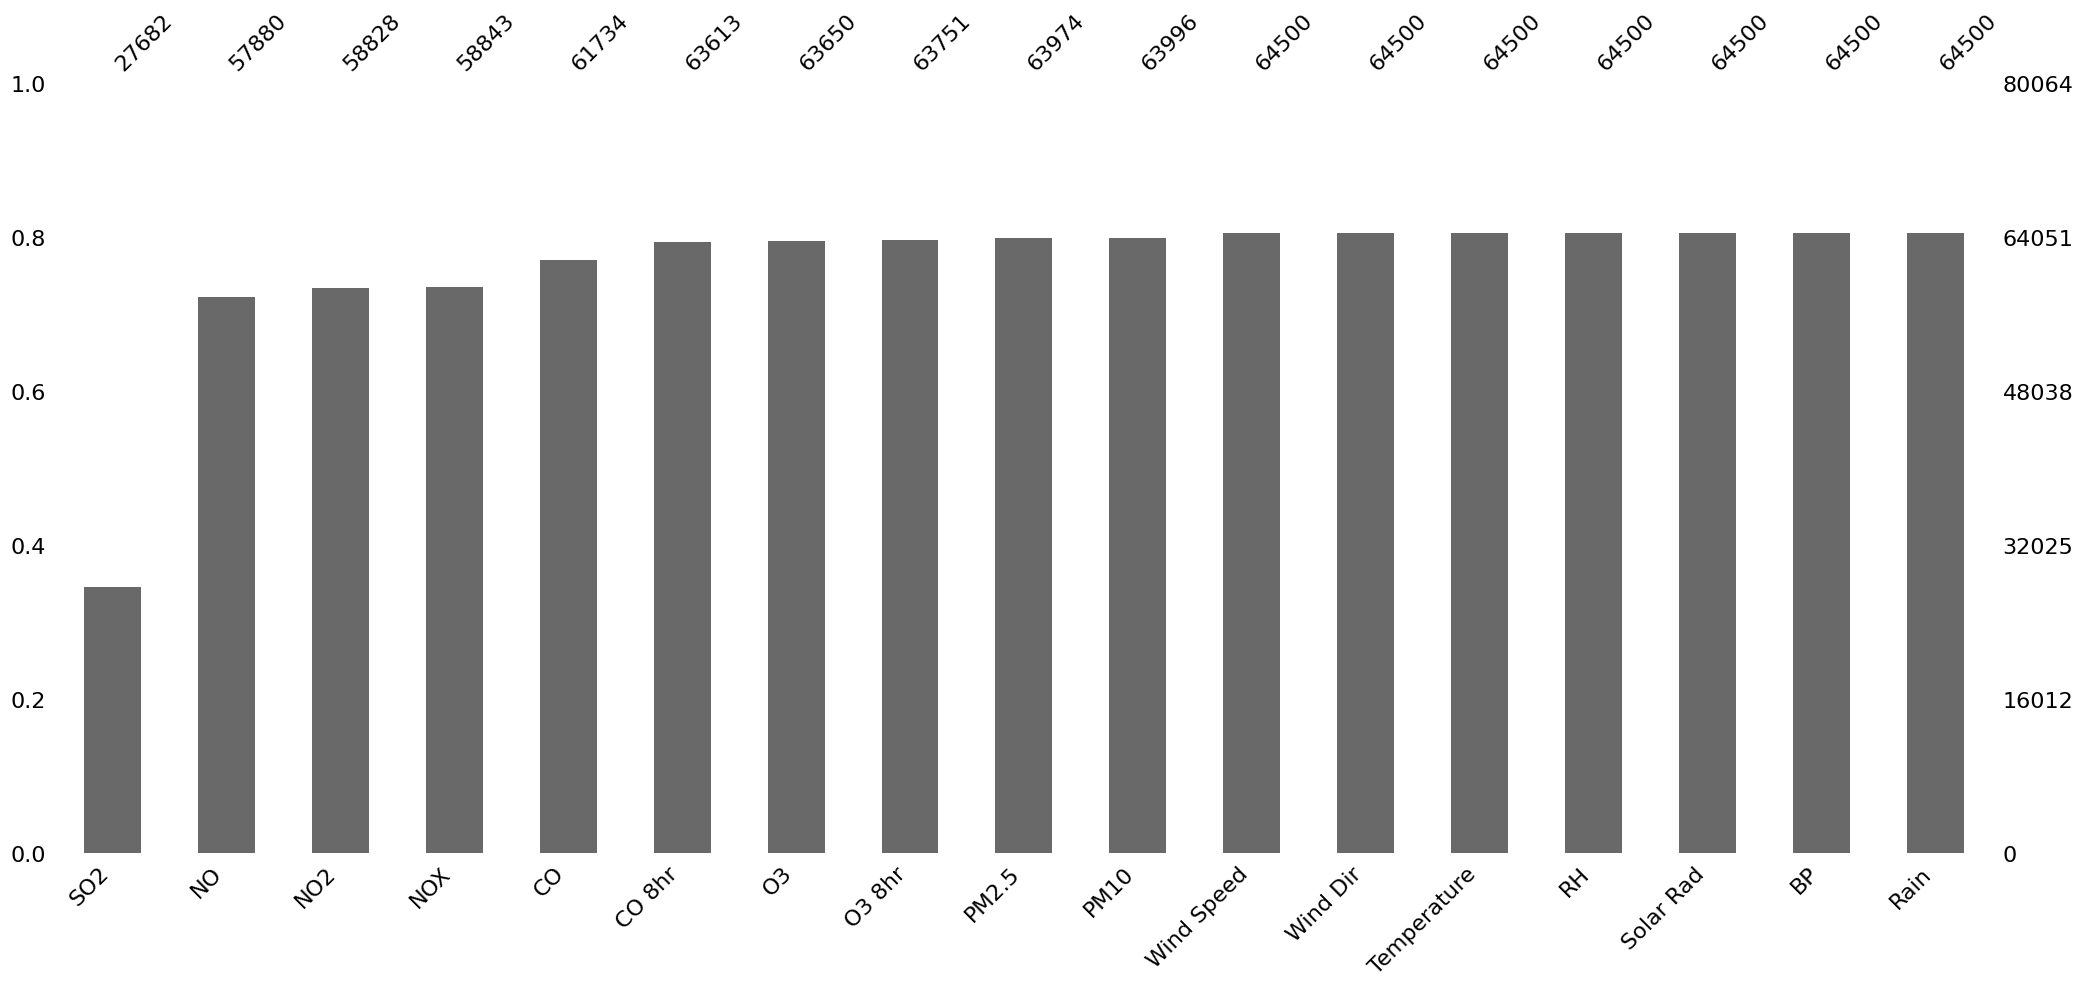

In [ ]:
msno.bar(df)

<Axes: >

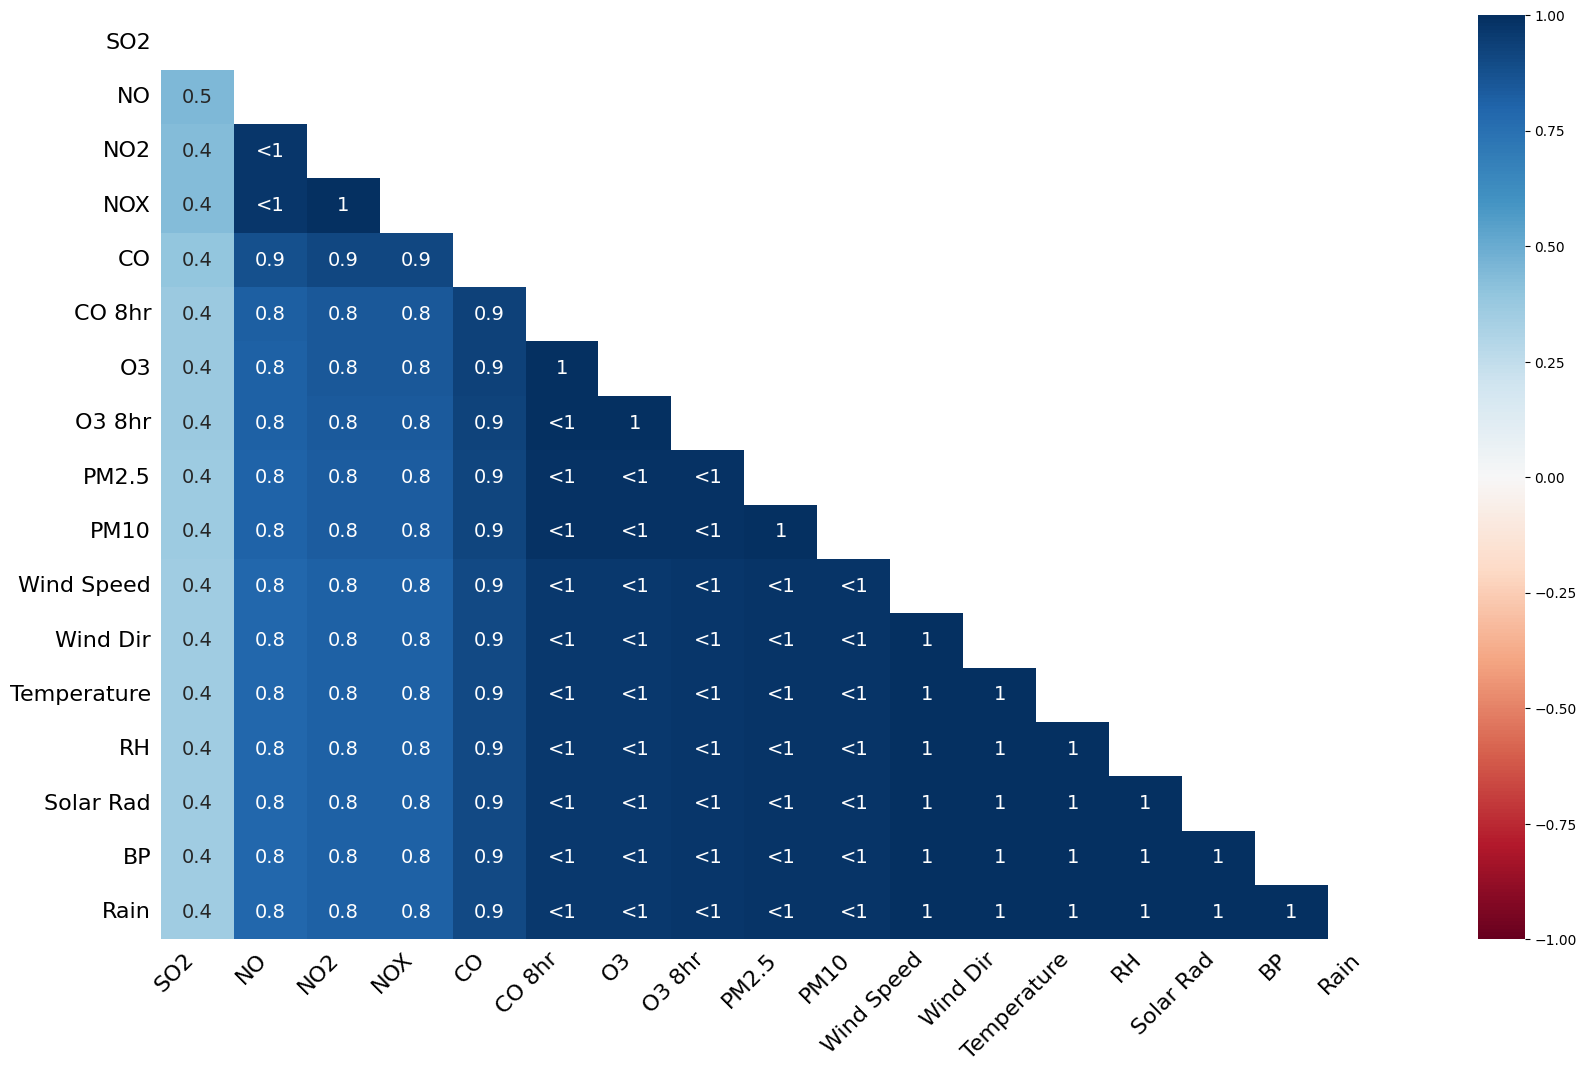

In [ ]:
msno.heatmap(df)

#6 - Prepare for model
Separate the target and features to train a model

In [ ]:
target = "PM10"
features = ['NO', 'NO2', 'CO', 'O3', 'Wind Speed', 'Temperature', 'RH', 'Solar Rad', 'BP']
train_df = df.dropna(subset=[target])
X = train_df[features]
y = train_df[target]

#7 - Dimensionality reduction
usign different methods and comparing the results

In [ ]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X[:2000].dropna())

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X[:2000].dropna())

reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, random_state=42)
X_umap = reducer.fit_transform(X[:2000].dropna())

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


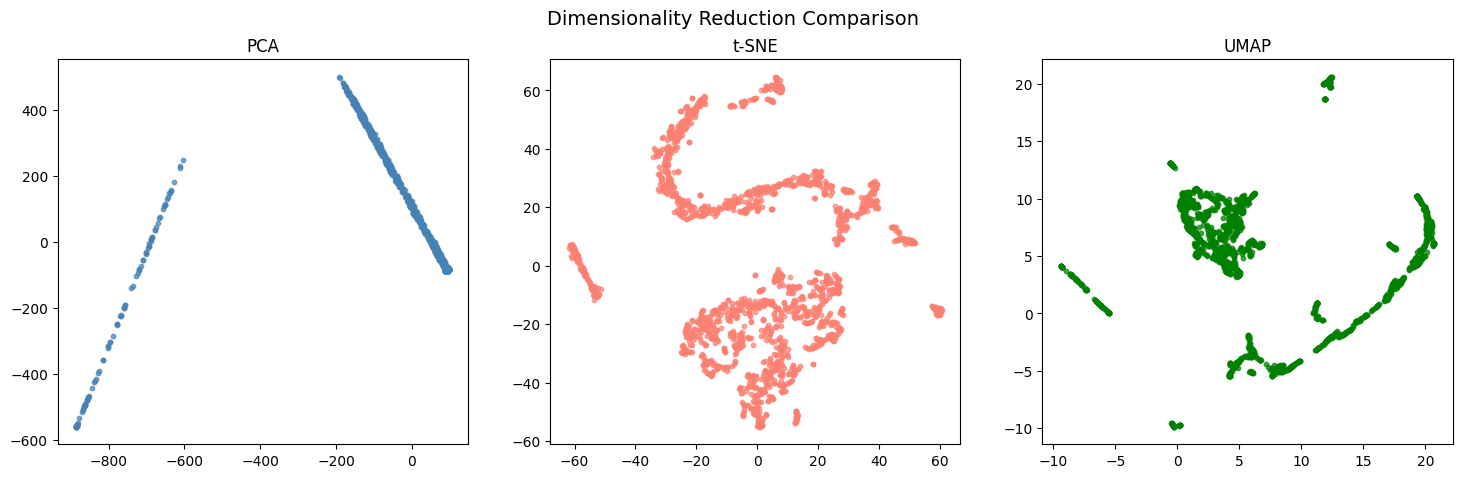

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].scatter(X_pca[:,0], X_pca[:,1], s=10, alpha=0.7, c='steelblue')
axs[0].set_title("PCA")

axs[1].scatter(X_tsne[:,0], X_tsne[:,1], s=10, alpha=0.7, c='salmon')
axs[1].set_title("t-SNE")

axs[2].scatter(X_umap[:,0], X_umap[:,1], s=10, alpha=0.7, c='green')
axs[2].set_title("UMAP")

plt.suptitle("Dimensionality Reduction Comparison", fontsize=14)
plt.show()

# 8 - Train model
Train and test the model on separated data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

error = mean_squared_error(y_test, pred)
r2score = r2_score(y_test, pred)
print("MAE: ", error)
print("R2: ", r2score)

MAE:  1735.6994858676458
R2:  0.7811749216962791


# 9 - Fill target column
Predict and fill the missingness in target column

Visualize the missingness of the other columns

In [ ]:
missing_rows = df[df[target].isnull()]
X_missing = missing_rows[features]
df.loc[df[target].isnull(), target] = model.predict(X_missing)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [ ]:
df.isnull().sum()

,0
SO2,52382
NO,22184
NO2,21236
NOX,21221
CO,18330
CO 8hr,16451
O3,16414
O3 8hr,16313
PM2.5,16090
PM10,0


<Axes: >

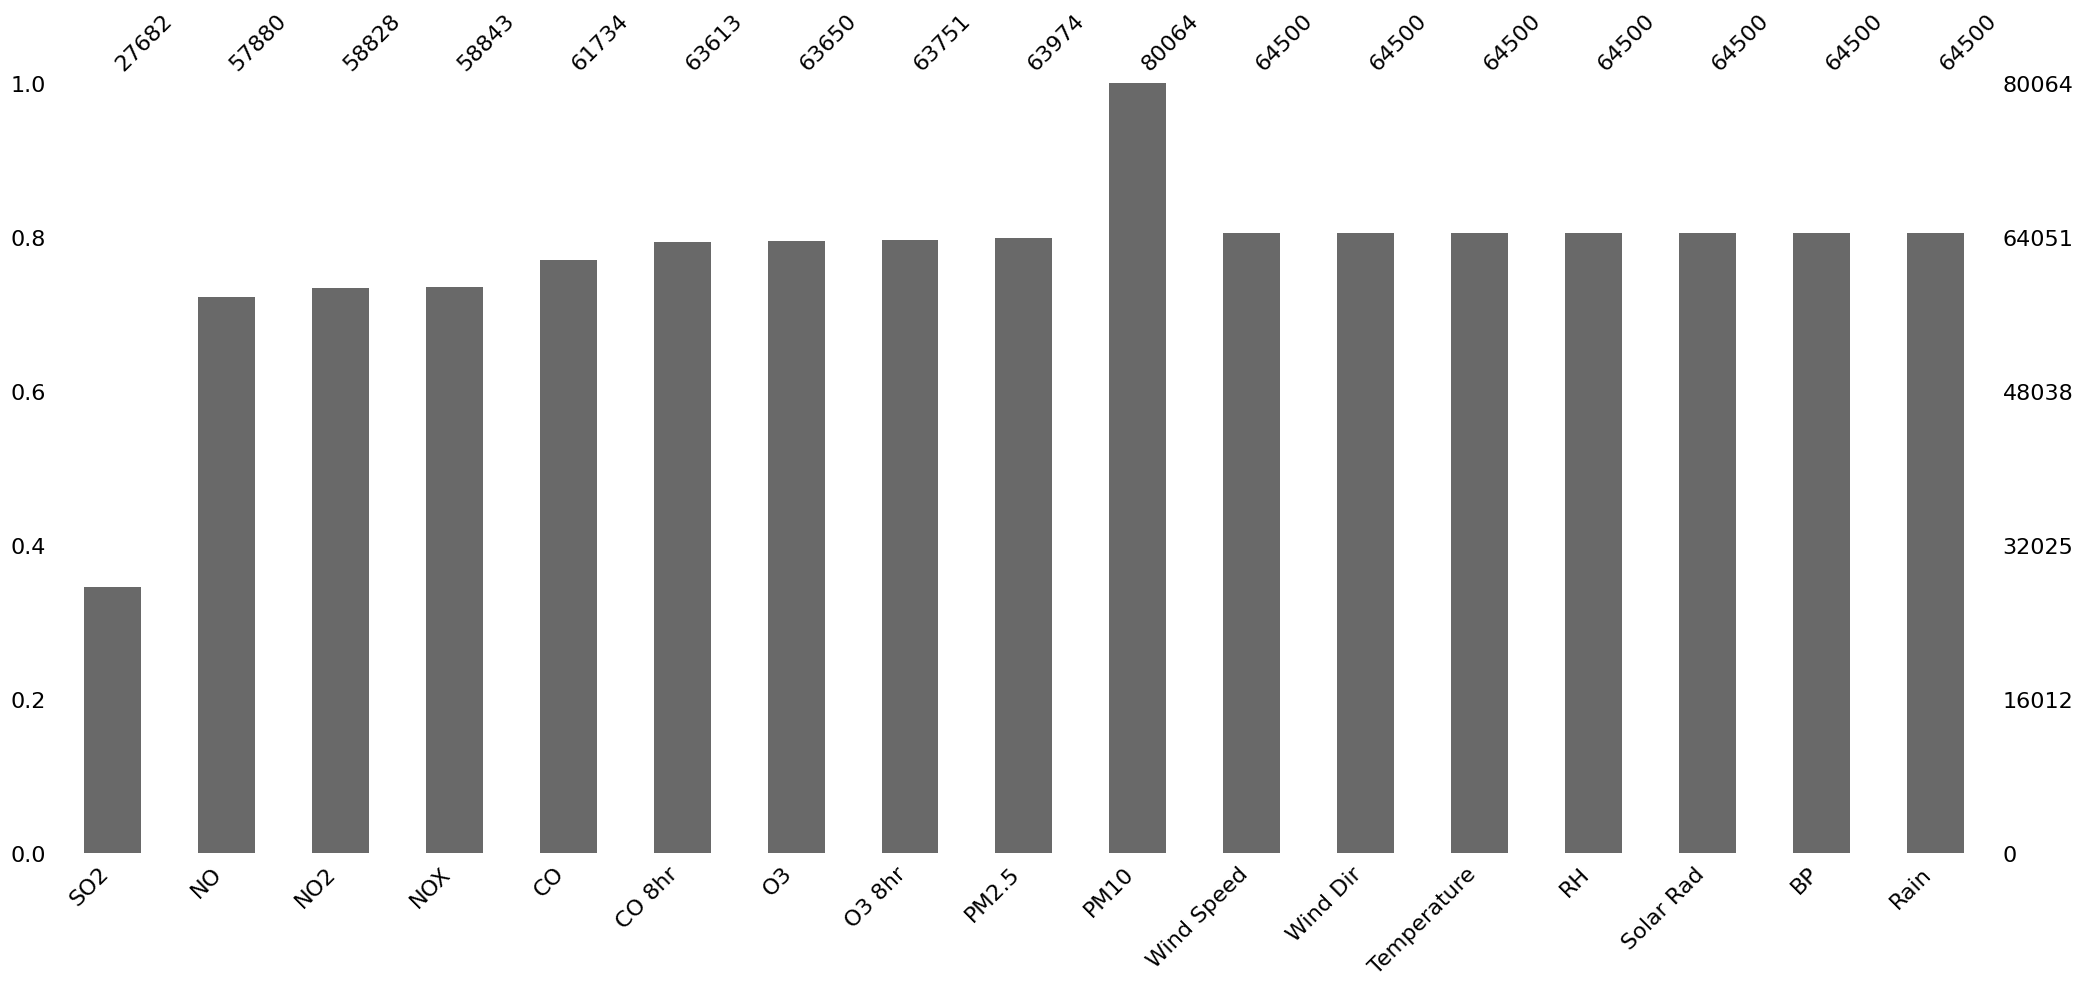

In [ ]:
msno.bar(df)

#10 - SHAP explainability
Explains which features most influence PM10 predictions

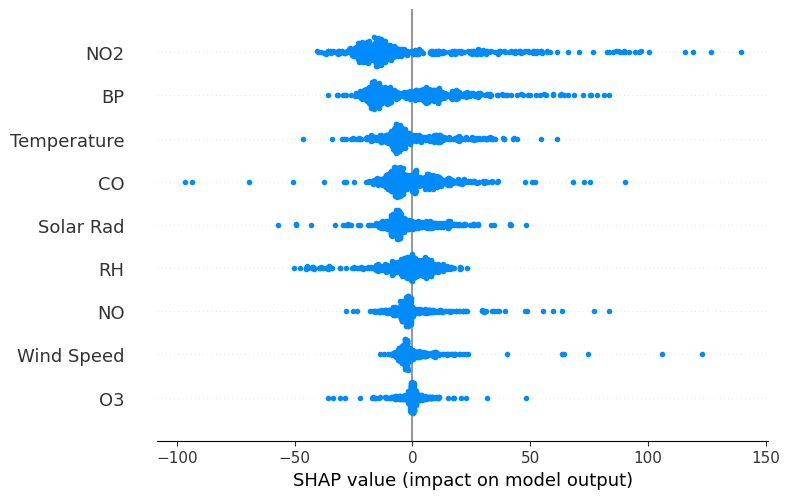

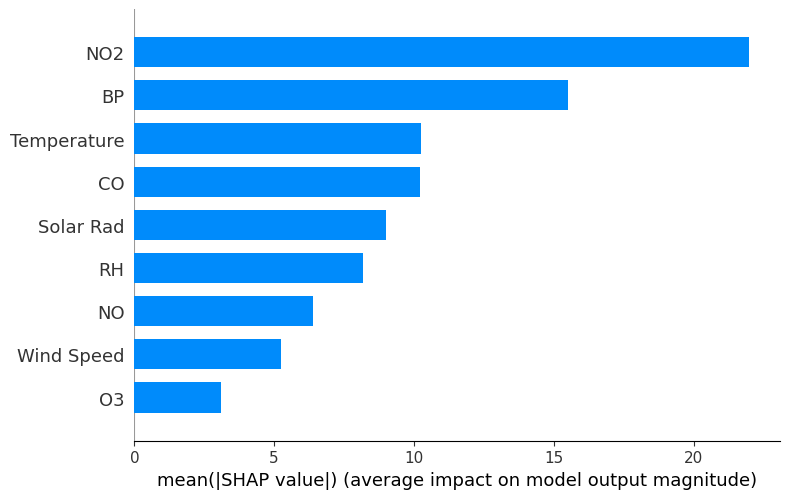

In [ ]:
X_sample = X_test[:500]
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_sample)
shap.summary_plot(shap_values, feature_names=features)
shap.summary_plot(shap_values, feature_names=features, plot_type='bar', )

#11 - Visualize clusters
A clustering algorithm shows clusters after using umap

Text(0.5, 1.0, 'UMAP clusters of Air Quality')

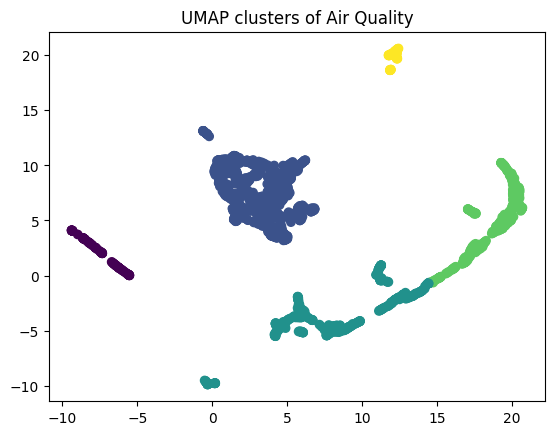

In [ ]:
clusters = KMeans(n_clusters=5, random_state=42).fit_predict(X_umap)
plt.scatter(X_umap[:,0], X_umap[:,1], c=clusters, cmap='viridis')
plt.title("UMAP clusters of Air Quality")

#12 - Visualize correlation
Heatmap shows correlation between features

<Axes: >

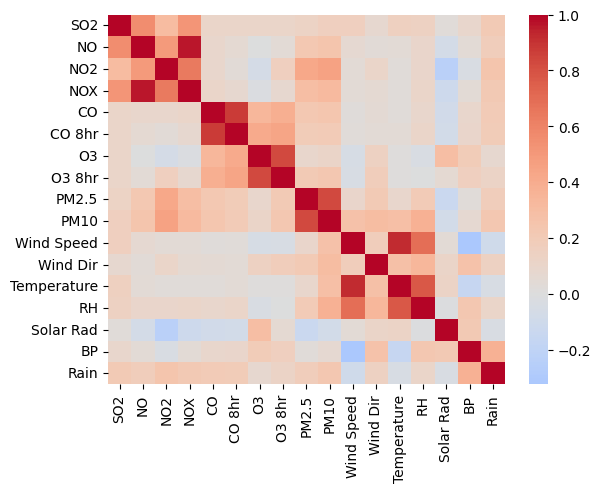

In [ ]:
sns.heatmap(df.corr(), cmap='coolwarm', center=0)

#13 - Visualize Average PM10 by Month

<Axes: title={'center': 'Average PM10 by Month'}, xlabel='month'>

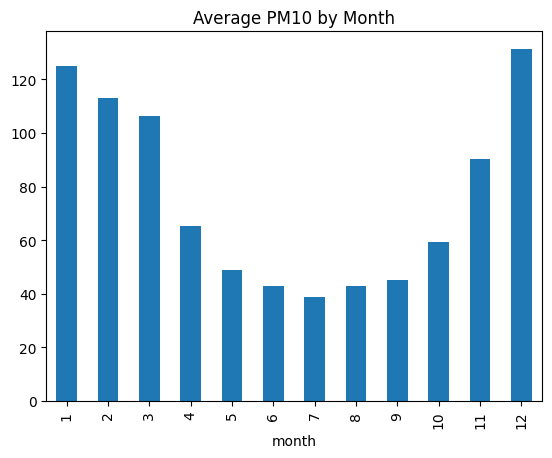

In [ ]:
df.reset_index(inplace=True)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df.groupby('month')['PM10'].mean().plot(kind='bar', title="Average PM10 by Month")